In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import the csv file from the Local Library
df = pd.read_csv("ML case Study.csv",header=0)

In [3]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


In [5]:
df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


In [6]:
# missing values

print(df.isnull().sum())

College                0
City                   0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
dtype: int64


In [15]:
# get_dummies is used to convert the categorical data into the numerical to make it possibly run and work on the regression model.
df = pd.get_dummies(df, columns=["Role"], prefix = ['Role'], drop_first=True)

In [16]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,SVNIT Surat,Asansol,55523.0,3,66,19,71406.58,1
1,NIT Bhopal,Ajmer,57081.0,1,84,18,68005.87,0
2,"IEM, Kolkata",Rajpur Sonarpur,60347.0,2,52,28,76764.02,0
3,"KIIT, Bhubaneswar",Ajmer,49010.0,2,81,33,82092.39,0
4,DTU,Durgapur,57879.0,4,74,32,73878.10,0


In [17]:
df_city=pd.read_csv("cities.csv",header=0)

In [18]:
df_city.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [19]:
df_clg=pd.read_csv("Colleges.csv",header=0)

In [20]:
df_clg.tail()

,Tier 1,Tier 2,Tier 3
23,NaN,NIT Sikkim,NaN
24,NaN,IIIT Jabalpur,NaN
25,NaN,Jalpaiguri Government Engineering College,NaN
26,NaN,IIEST/BESU Shibpur,NaN
27,NaN,R.V. College of Engineering,NaN


In [22]:
df_clg.tail()

,Tier 1,Tier 2,Tier 3
23,NaN,NIT Sikkim,NaN
24,NaN,IIIT Jabalpur,NaN
25,NaN,Jalpaiguri Government Engineering College,NaN
26,NaN,IIEST/BESU Shibpur,NaN
27,NaN,R.V. College of Engineering,NaN


In [23]:
# Used the Tolist feature as per explained in the theory lecture.
Tier1=df_clg["Tier 1"].tolist()
Tier2=df_clg["Tier 2"].tolist()
Tier3=df_clg["Tier 3"].tolist()

In [24]:
df_clg.isnull().sum()

Tier 1    6
Tier 2    0
Tier 3    9
dtype: int64

In [25]:
df_clg.fillna(value = 0)

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus
5,IIT Roorkee,IIIT Lucknow,"KIIT, Bhubaneswar"
6,IIT Guwahati,MNNIT Allahabad,Amity University
7,IIIT Hyderabad,Punjab Engineering College,"BMS College, Bangalore"
8,BITS Pilani (Pilani Campus),DAIICT,"PES University, Bangalore"
9,IIT Indore,MNIT Jaipur,"USIT, Delhi"


In [26]:
Tier2

['IIIT Bangalore',
 'IIIT Delhi',
 'IGDTUW',
 'NIT Calicut',
 'IIITM Gwalior',
 'IIIT Lucknow',
 'MNNIT Allahabad',
 'Punjab Engineering College',
 'DAIICT',
 'MNIT Jaipur',
 'NIT Durgapur',
 'VNIT Nagpur',
 'LNMIIT',
 'BIT Mesra',
 'SVNIT Surat',
 'NIT Jalandhar',
 'NIT Jamshedpur',
 'NIT Kurukshetra',
 'NIT Patna',
 'NIT Raipur',
 'NIT Bhopal',
 'NIT Rourkela',
 'NIT Silchar',
 'NIT Sikkim',
 'IIIT Jabalpur',
 'Jalpaiguri Government Engineering College',
 'IIEST/BESU Shibpur',
 'R.V. College of Engineering']

In [27]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,SVNIT Surat,Asansol,55523.0,3,66,19,71406.58,1
1,NIT Bhopal,Ajmer,57081.0,1,84,18,68005.87,0
2,"IEM, Kolkata",Rajpur Sonarpur,60347.0,2,52,28,76764.02,0
3,"KIIT, Bhubaneswar",Ajmer,49010.0,2,81,33,82092.39,0
4,DTU,Durgapur,57879.0,4,74,32,73878.10,0


In [28]:
for item in df.College:
    if item in Tier1:
        df["College"].replace(item,1,inplace=True)
    elif item in Tier2:
        df["College"].replace(item,2,inplace=True)
    elif item in Tier3:
        df["College"].replace(item,3,inplace=True)

In [29]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,Asansol,55523.0,3,66,19,71406.58,1
1,2,Ajmer,57081.0,1,84,18,68005.87,0
2,3,Rajpur Sonarpur,60347.0,2,52,28,76764.02,0
3,3,Ajmer,49010.0,2,81,33,82092.39,0
4,1,Durgapur,57879.0,4,74,32,73878.10,0


In [31]:
df_city=pd.read_csv("cities.csv",header=0)

In [32]:
df_city.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [33]:
Metro_city=df_city["Metrio City"].tolist()
Non_Metrocity=df_city["non-metro cities"].tolist()

In [34]:
df_city.isnull().sum()

Metrio City         0
non-metro cities    1
dtype: int64

In [35]:
df_city.fillna(value = 0)

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode
5,Hyderabad,Rajpur Sonarpur
6,Ahmedabad,Kolhapur
7,Pune,Ajmer
8,Surat,0


In [36]:
Metro_city

['Mumbai',
 'Delhi',
 'Kolkata',
 'Chennai',
 'Bangalore',
 'Hyderabad',
 'Ahmedabad',
 'Pune',
 'Surat']

In [37]:
Non_Metrocity

['Dehradun',
 'Durgapur',
 'Asansol',
 'Rourkela',
 'Kozhikode',
 'Rajpur Sonarpur',
 'Kolhapur',
 'Ajmer',
 nan]

In [38]:
for item in df.City:
    if item in Metro_city:
        df["City"].replace(item,1,inplace=True)
    elif item in Non_Metrocity:
        df["City"].replace(item,0,inplace=True)    

In [39]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,1
1,2,0,57081.0,1,84,18,68005.87,0
2,3,0,60347.0,2,52,28,76764.02,0
3,3,0,49010.0,2,81,33,82092.39,0
4,1,0,57879.0,4,74,32,73878.10,0


In [40]:
df.tail()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
1584,1,1,61285.0,3,44,60,77283.59,0
1585,1,0,63140.0,1,44,24,68416.86,0
1586,1,1,44907.0,1,60,19,70186.19,0
1587,1,0,52054.0,2,67,29,73394.09,0
1588,2,1,44353.0,3,75,18,70056.31,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Previous CTC         1589 non-null   float64
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Role_Manager         1589 non-null   uint8  
dtypes: float64(2), int64(5), uint8(1)
memory usage: 88.6 KB


In [42]:
df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.206419
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.404862
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000,0.000000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000,0.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000


In [43]:
df.corr()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,-0.014946,0.041979,-0.055060,0.003539,0.011752,-0.029592,-0.014749
City,-0.014946,1.000000,0.004644,0.051670,-0.018616,-0.023613,-0.020365,-0.048671
Previous CTC,0.041979,0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,0.012321
Previous job change,-0.055060,0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,0.003539,-0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.017858
EXP (Month),0.011752,-0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.026751
CTC,-0.029592,-0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,0.621311
Role_Manager,-0.014749,-0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,1.000000


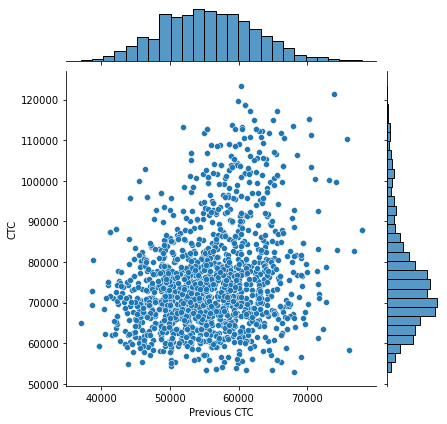

In [44]:
# sns.jointplot

sns.jointplot(x='Previous CTC', y='CTC', data=df)

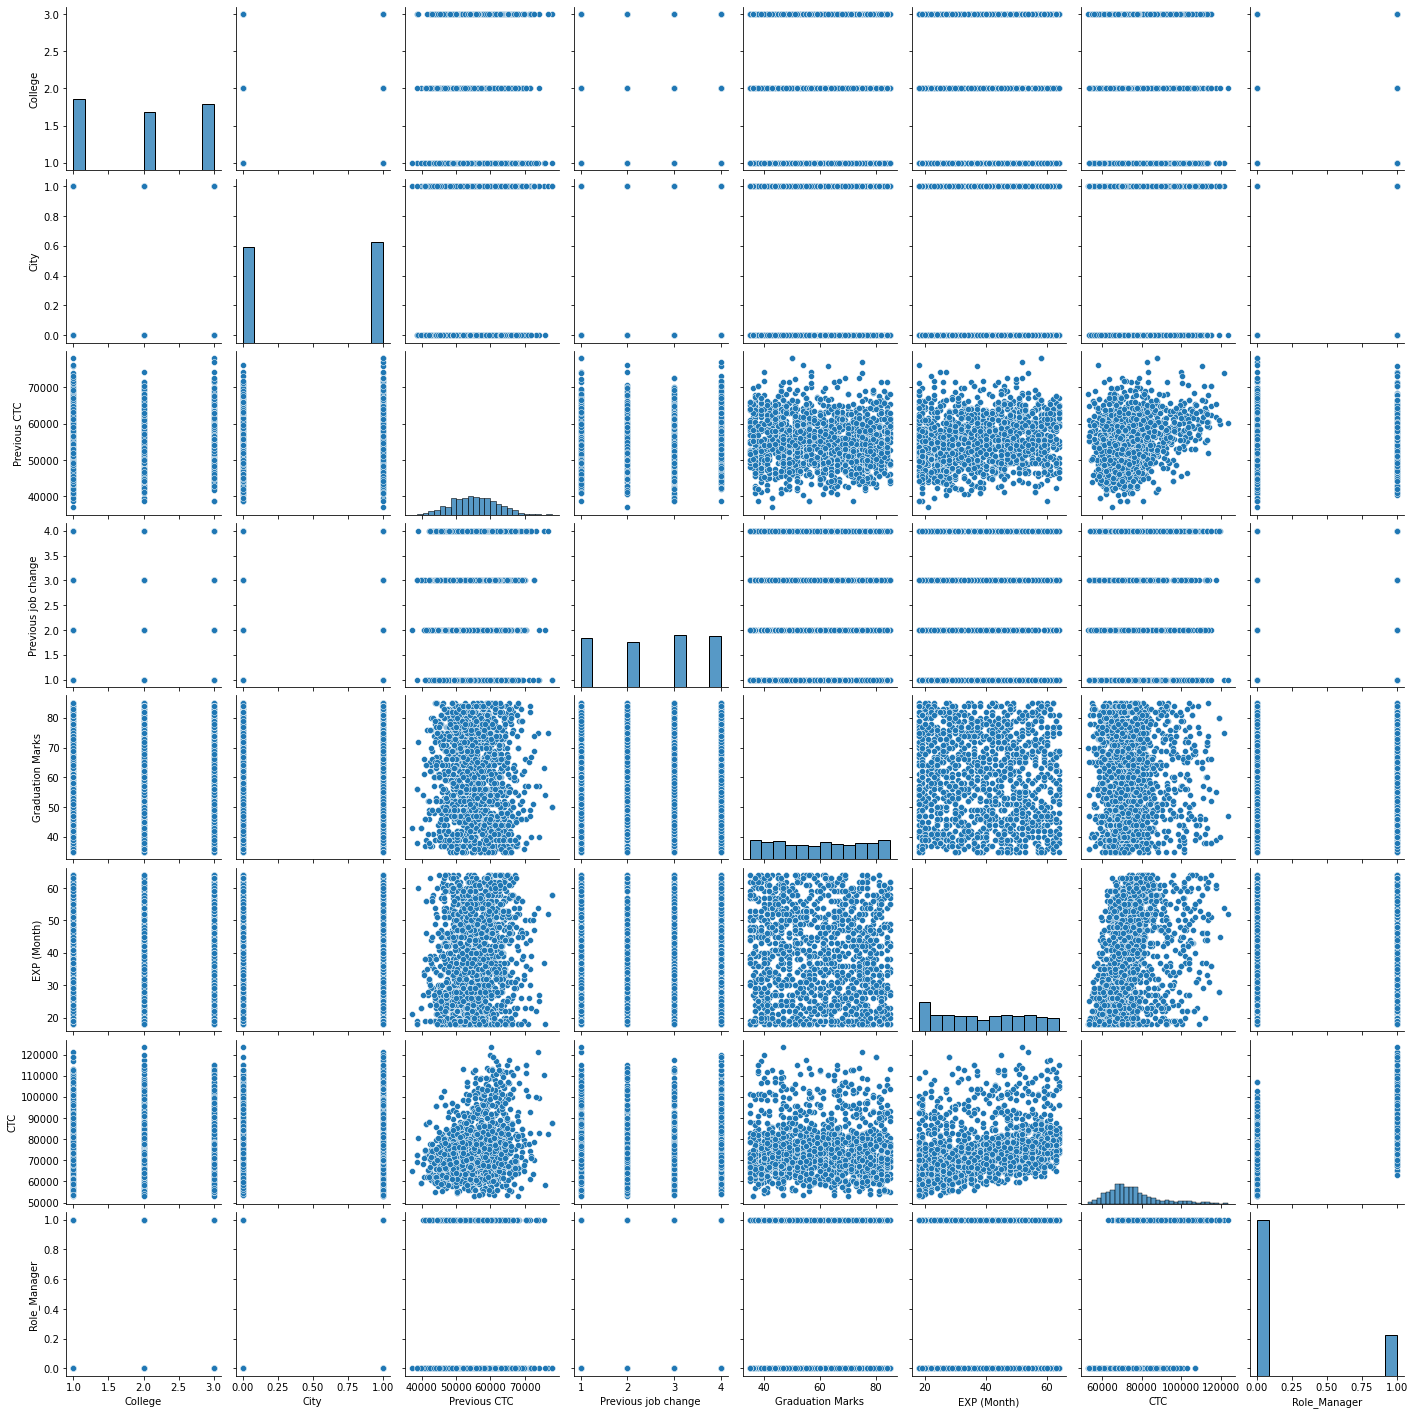

In [45]:
sns.pairplot(df) 
# Relation between diffrent variables given in the dataset
plt.show()

# Splitting the Training and Testing Data 

In [46]:
# Firstly import all the required libraries 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
import statsmodels.api as sn
from sklearn import tree
import math

In [47]:
X = df.drop('CTC', axis = 1)

In [48]:
y = df['CTC']

In [49]:
X

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
0,2,0,55523.0,3,66,19,1
1,2,0,57081.0,1,84,18,0
2,3,0,60347.0,2,52,28,0
3,3,0,49010.0,2,81,33,0
4,1,0,57879.0,4,74,32,0
...,...,...,...,...,...,...,...
1584,1,1,61285.0,3,44,60,0
1585,1,0,63140.0,1,44,24,0
1586,1,1,44907.0,1,60,19,0
1587,1,0,52054.0,2,67,29,0


In [50]:
y

0       71406.58
1       68005.87
2       76764.02
3       82092.39
4       73878.10
          ...   
1584    77283.59
1585    68416.86
1586    70186.19
1587    73394.09
1588    70056.31
Name: CTC, Length: 1589, dtype: float64

In [51]:
X_test, X_train, y_test, y_train = train_test_split(X,y,test_size = 0.2, random_state = 0) 

# To perform analysis we dont use whole data that is 100%. We split the data in 80% - 20%. 
# Split the 80% data for training and 20% data for testing.

In [99]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1272, 7), (317, 7), (1272,), (317,))

In [100]:
df.shape

(1589, 8)

# 1. Regressive Model using Linear Regression .


In [53]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [54]:
linreg.coef_ 
# regression coeficient of independent variable

array([-2.53917965e+02, -1.84439137e+02,  3.77594387e-01,  4.96866015e+01,
        1.03279629e+00,  2.69979176e+02,  1.96080192e+04])

In [55]:
linreg.intercept_

40126.65275914408

In [56]:
linreg.predict(X_test)

array([ 93509.2350236 ,  67717.36748393,  78430.00809347,  63211.70870371,
        78475.23049062,  88479.79196434,  92037.21158168,  86704.41674196,
        87532.26247193,  74479.15600495,  69060.69786375,  75983.88970633,
        70788.94559993,  69483.32143126,  79320.80261017,  65815.32565418,
        68187.68275046,  64328.69890207,  87479.97928867,  93380.31929536,
        72647.67365716,  76863.38335481,  81039.4574565 ,  70421.25452613,
        65504.97399149,  68182.68583903,  72224.36954713,  64763.16594554,
        78221.46859744,  72559.24935544,  72347.60044994,  98165.34758033,
        71318.74519427,  69802.78782399,  68917.08306803,  67591.85846014,
        69736.065962  ,  75616.68379306,  89441.38974694,  73588.96318159,
        72428.87366385,  85847.05586091,  89541.28985338,  76146.15083165,
        65463.01017159,  76450.66466832,  67121.92872571,  94236.13277464,
        85624.18599875,  93661.61592386,  69571.0214426 ,  91453.64057328,
        63569.02965422,  

In [57]:
prediction = linreg.predict(X_test)

Text(0, 0.5, 'Predicted y')

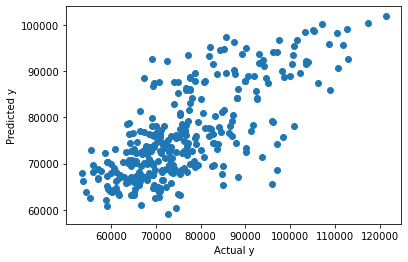

In [58]:
plt.scatter(y_test, prediction) 
# Scatter plot graph of test and predicted data
plt.xlabel('Actual y')
plt.ylabel('Predicted y')

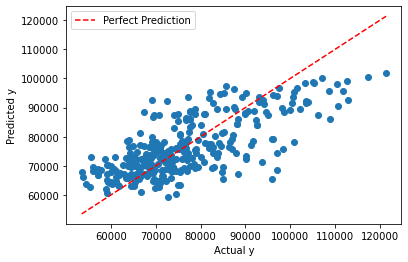

In [59]:
import matplotlib.pyplot as plt

# Assume 'y_test' and 'prediction' are  actual and predicted values
# Add a line 
# Set labels for the axes 
# Add a legend


fig, ax = plt.subplots()
ax.scatter(y_test, prediction)

ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')

ax.set_xlabel('Actual y')
ax.set_ylabel('Predicted y')

ax.legend()
plt.show()

In [60]:
r2 = r2_score(y_test, prediction)
print(f'R-squared Score: {r2}')

R-squared Score: 0.5304354101962221


In [61]:
print('MSE :', metrics.mean_squared_error(y_test,prediction))

MSE : 81801324.44301261


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


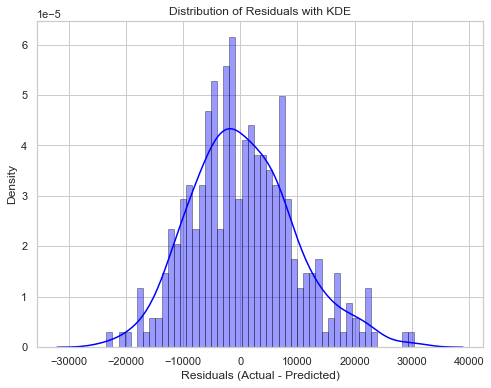

In [62]:
# Assuming 'y_test' and 'prediction' are actual and predicted values
# Create a distribution plot of residuals with KDE
# Add labels and title

residuals = y_test - prediction

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.distplot(residuals, bins=50, kde=True, color='blue', hist_kws=dict(edgecolor="k", linewidth=1))

plt.title('Distribution of Residuals with KDE')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Density')

plt.show()


# 2. Decision Tree

In [63]:
from sklearn.tree import DecisionTreeRegressor

In [64]:
reg_tree = DecisionTreeRegressor(criterion = "squared_error", max_depth = 10,min_samples_split = 10, random_state = 5)

In [65]:
reg_tree.fit(X_train, y_train)
reg_tree.fit(X_test, y_test)

DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=5)

In [66]:
y_predtree = reg_tree.predict(X_test)

In [67]:
r2_Tree = r2_score(y_test, y_predtree)
print(f'R-squared Score: {r2_Tree}')

R-squared Score: 0.8250261212057303


In [68]:
print('MSE :', metrics.mean_squared_error(y_test,y_predtree))

MSE : 30481632.00356226


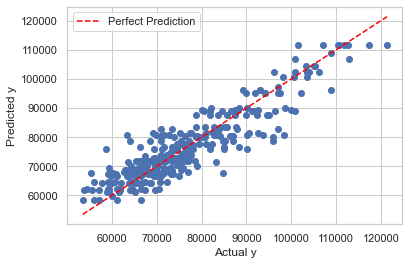

In [69]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predtree)

# Add a line 
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')

# Set labels for the axes
ax.set_xlabel('Actual y')
ax.set_ylabel('Predicted y')

# Add a legend
ax.legend()

plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


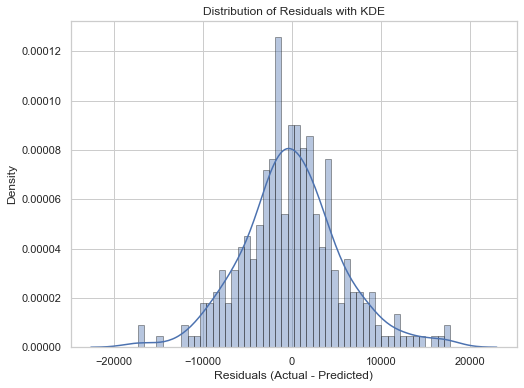

In [70]:
residuals_Tree = y_test - y_predtree

#  distribution plot of residuals with KDE
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.distplot(residuals_Tree, bins=50, kde=True, color='b', hist_kws=dict(edgecolor="k", linewidth=1))

# Add labels and title
plt.title('Distribution of Residuals with KDE')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Density')

plt.show()


In [71]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [72]:
dot_data = tree.export_graphviz(reg_tree, feature_names = X_test.columns, filled = True)
from IPython.display import Image
import pydotplus

# 3. Stats Regressive

In [74]:
x_stat  = sn.add_constant(X_train)
model = sn.OLS(y_train, x_stat.astype(float))

In [75]:
final = model.fit()

In [76]:
final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     205.1
Date:                Thu, 25 Jan 2024   Prob (F-statistic):          3.28e-203
Time:                        09:20:40   Log-Likelihood:                -13311.
No. Observations:                1272   AIC:                         2.664e+04
Df Residuals:                    1264   BIC:                         2.668e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.013e+04   2447.489     16.395      0.000    3.53e+04    4.49e+04
College              -253.9180    283.152     -0.897      0.370    -809.418     301.582
City                 -184.4391    478.528     -0.385      0.700   -1123.236     754.357
Previous CTC            0.3776      0.036     10.379      0.000       0.306       0.449
Previous job change    49.6866    211.892      0.234      0.815    -366.012     465.385
Graduation Marks        1.0328     16.060      0.064      0.949     -30.474      32.540
EXP (Month)           269.9792     17.004     15.877      0.000     236.619     303.339
Role_Manager         1.961e+04    606.660     32.321      0.000    1.84e+04    2.08e+04
==============================================================================
Omnibus:                       41.868   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.457
Skew:                           0.407   Prob(JB):                     4.95e-11
Kurtosis:                       3.482   Cond. No.                     5.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 4.K Nearest Neighbour

In [77]:
from sklearn.neighbors import KNeighborsRegressor
reg_knn = KNeighborsRegressor()
reg_knn.fit(X_train, y_train)
reg_knn.fit(X_test, y_test)

KNeighborsRegressor()

In [78]:
y_predknn = reg_knn.predict(X_test)

In [79]:
r2_knn = r2_score(y_test, y_predknn)
print(f'R-squared Score: {r2_knn}')

R-squared Score: 0.32618760196233776


In [80]:
# MSE - Mean Squared Error
print('MSE :', metrics.mean_squared_error(y_test,y_predknn))

MSE : 117382672.76209271


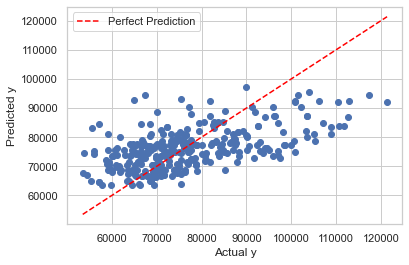

In [81]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predknn)

ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')

ax.set_xlabel('Actual y')
ax.set_ylabel('Predicted y')

ax.legend()
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


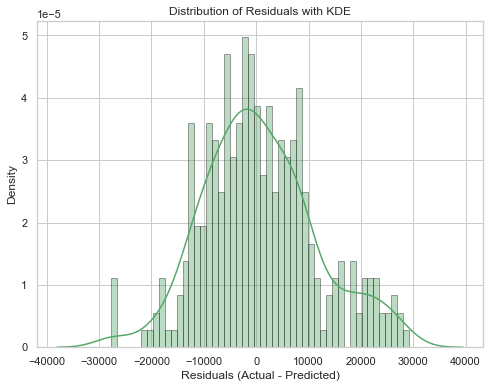

In [82]:
residuals_knn = y_test - y_predknn

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.distplot(residuals_knn, bins=50, kde=True, color='g', hist_kws=dict(edgecolor="k", linewidth=1))

plt.title('Distribution of Residuals with KDE')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Density')
plt.show()

# 5. Random Forest  Model .

In [83]:
from sklearn.ensemble import RandomForestRegressor
reg_randfor = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [84]:
reg_randfor.fit(X_train, y_train)
reg_randfor.fit(X_test, y_test)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [85]:
y_predictrandomforest= reg_randfor.predict(X_test)

In [86]:
r2_randfor = r2_score(y_test, y_predictrandomforest)
print(f'R-squared Score: {r2_randfor}')

R-squared Score: 0.9375864341544549


In [87]:
print('MSE :', metrics.mean_squared_error(y_test,y_predictrandomforest))

MSE : 10872864.905571923


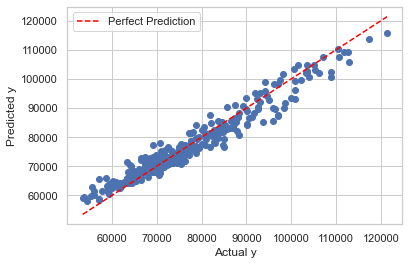

In [88]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predictrandomforest)
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
ax.set_xlabel('Actual y')
ax.set_ylabel('Predicted y')

ax.legend()
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


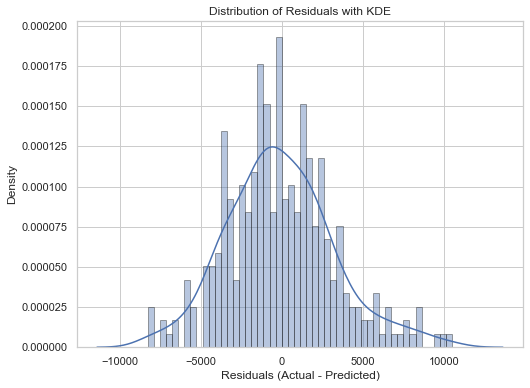

In [118]:
residuals_randfor = y_test - y_predictrandomforest

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.distplot(residuals_randfor, bins=50, kde=True, color='b', hist_kws=dict(edgecolor="k", linewidth=1))

plt.title('Distribution of Residuals with KDE')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Density')
plt.show()

# 6. Xgboost Model

In [90]:
# conda install Xgboost

Note: you may need to restart the kernel to use updated packages.


In [103]:
from xgboost import XGBRegressor
reg_xgboost = XGBRegressor()

In [104]:
reg_xgboost.fit(X_train, y_train)
reg_xgboost.fit(X_test, y_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [105]:
y_predictxgboost=reg_xgboost.predict(X_test)

In [106]:
r2_xgboost = r2_score(y_test, y_predictxgboost)
print(f'R-squared Score: {r2_xgboost}')

R-squared Score: 0.9999671354261609


In [107]:
X_train.shape

(1272, 7)

In [108]:
X_test.shape

(317, 7)

In [111]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_predictxgboost)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

r2_xgboost = r2_score(y_test, y_predictxgboost)
print(f'R-squared Score: {r2_xgboost}')

Mean Squared Error (MSE): 5725.230832285628
Root Mean Squared Error (RMSE): 75.6652551194115
R-squared Score: 0.9999671354261609


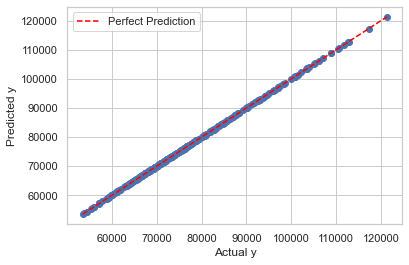

In [116]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predictxgboost)

ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')

ax.set_xlabel('Actual y')
ax.set_ylabel('Predicted y')

ax.legend()
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


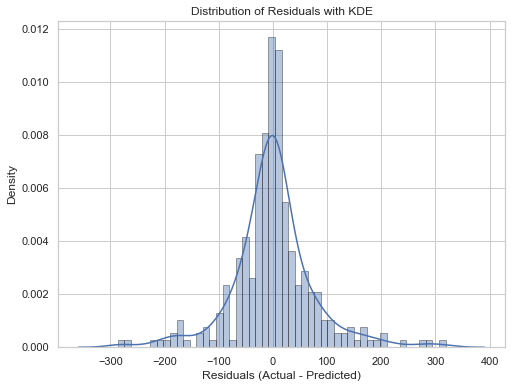

In [119]:
residuals_xgboost = y_test - y_predictxgboost

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.distplot(residuals_xgboost, bins=50, kde=True, color='b', hist_kws=dict(edgecolor="k", linewidth=1))

plt.title('Distribution of Residuals with KDE')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Density')
plt.show()

In [123]:
data = {'Model':['Multiple Regressive Model', 'Decision Tree Model', 'KNN Model', 'Random Forest','Xgboost Model'],
        'MSE': [metrics.mean_squared_error(y_test,prediction),metrics.mean_squared_error(y_test,y_predtree), metrics.mean_squared_error(y_test,y_predknn), metrics.mean_squared_error(y_test,y_predictrandomforest), metrics.mean_squared_error(y_test,y_predictxgboost)],
      'R2_score': [r2, r2_Tree,  r2_knn, r2_randfor,  r2_xgboost]}

In [126]:
model_evaluation = pd.DataFrame(data)

In [127]:
model_evaluation

,Model,MSE,R2_score
0,Multiple Regressive Model,8.180132e+07,0.530435
1,Decision Tree Model,3.048163e+07,0.825026
2,KNN Model,1.173827e+08,0.326188
3,Random Forest,1.087286e+07,0.937586
4,Xgboost Model,5.725231e+03,0.999967


In [131]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(reg_xgboost, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive and calculate RMSE
rmse_scores = np.sqrt(-cv_scores)

# Print the cross-validation scores
print("Cross-Validation RMSE Scores:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))

Cross-Validation RMSE Scores: [5907.69155459 9047.76568944 8712.6330916  9269.0036934  5600.36080734]
Mean RMSE: 7707.490967271401


# Q1.
---> Answer

- we're working on an exciting project involving the creation of a machine learning model tailored to predict employee salaries using diverse datasets.

- The dataset provided for this project encompasses a wide array of features, including:
  - College tier
  - City type
  - Job role
  - Previous compensation 
  - Job change history
  - Graduation marks
  - Months of experience
  - The target variable
  - Current Total Compensation 

- This endeavor is not only engaging but also highly relevant as it directly tackles a prevalent industry challenge: determining competitive and equitable salaries for new hires efficiently.

- The dataset comprises both categorical and numerical data, offering a rich foundation for analysis and model development.

- Our primary objective is to develop a robust machine learning model capable of accurately predicting the salaries of newly recruited employees based on the provided dataset.

- Project not only promises to deliver valuable insights for our organization but also presents an opportunity to showcase our expertise in data analysis and machine learning.


# Q2.
---> Answer

Approach involves :

- Model Selection and Training :
   - Split the dataset into training and validation sets to evaluate model performance effectively.
   - Train various regression models (e.g., linear regression, decision trees, random forests, gradient boosting) using cross-validation techniques to fine-tune hyperparameters and prevent overfitting.

- Evaluation and Validation :
   - Evaluate the trained models using appropriate performance metrics for regression tasks, such as mean absolute error (MAE), mean squared error (MSE), or R-squared (R^2) score.
   - Compare the performance of different models to identify the most suitable one for predicting employee salaries accurately.

 By following this approach, we can effectively tackle the tasks outlined and develop a better machine learning model for predicting employee salaries based on diverse data.

# Q3.
---> Answer


- To complete the task of salary prediction, we used a range of machine learning models required for regression analysis. These models includes various techniques, including :

- For each model we trained using 80% of the data and its performance was evaluated on the remaining 20%. This enabled us to assess the effectiveness of each model in predicting salaries accurately.

- Models available are : 

        - Multiple Regressor
        - Statistical OLS Model
        - Decision Tree Model
        - KNN Model
        - Random Forest
        - XGBoost Model


# Q4.
---> Answer

The best models based on their performence are mentioned below : 
 
 1] Xgboost Model (0.999967)
   
   **Possible reason** 
   - XGBoost is highly flexible and can handle a wide range of data types and structures. Whether dealing with numerical or categorical features, XGBoost can accommodate diverse datasets, making it suitable for various real-world applications.
 
 2] Random Forest (0.937586)
   
   **Possible reason**
   - Random Forest inherently reduces overfitting by averaging the predictions of multiple decision trees. Additionally, it incorporates randomness during the tree-building process, such as feature sampling and bootstrap sampling, which helps prevent overfitting and improves generalization.

# Q5.
---> Answer

To further improve the performance of the selected model, Random Forest, consider the following steps:

**Error Analysis**: 

- Conduct thorough error analysis to understand the types of errors the model is making and identify patterns or common pitfalls. This can guide further refinement of the model and feature engineering efforts to address specific weaknesses.

**Regularization**: 

- Experiment with regularization techniques within the Random Forest algorithm, such as adjusting the minimum samples per leaf or maximum features considered per split, to control model complexity and mitigate overfitting.

**Model Interpretability**: 

- Enhance the interpretability of the Random Forest model by visualizing decision trees, feature importances, or partial dependence plots. This can provide valuable insights into how the model makes predictions and facilitate stakeholder understanding and trust.

# Thank you !